In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/gender_weight_height.csv')#,index_col='Index')
data["Gender"] = [1 if g == "Male" else 0 for g in data["Gender"]]
data.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [115]:
X = data[["Height", "Weight"]].values

In [117]:
y = data["Gender"].values

$$Euclidean\ Norm= \sqrt{\sum_{i}^{n}{\sum_{j}^{m}{(a_{ij}-b_{ij})^2}}}$$

In [216]:
def euclidean_norm(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sqrt(np.sum((a - b)**2, axis=1))

$$Frobenius\ Norm= \sqrt{\sum_{i}^{n}{\sum_{j}^{m}{|a_{ij}-b_{ij}|}}}$$

In [ ]:
def frobenius_norm(a,b):
    a = np.array(a)
    b = np.array(b)
    return np.sqrt(np.sum(np.abs(a - b)))

1. set k
2. initialize k centroids
3. for so many iterations
    <ol type="a">
  <li>find distance data points are from each centroid</li>
  <li>cluster the data points with the centroid they are closet too</li>
  <li>move the centroid to the mean of its cluster</li>
</ol>

In [331]:
class k_means:
    def __init__(self, k=3, tol=10e-4, iters=10, seed=None):
        self.k = k
        self.centroids = []
        self.k = k
        self.tol = tol
        self.iters = iters
        self.seed = seed
        
    def fit(self, X, y):
        # initialize clusters
        if self.seed != None:
            np.random.seed(self.seed)

        for i in range(0,self.k):
            self.centroids.append(np.random.uniform(X.min(),X.max(), X.ndim))
        for j in range(0,self.iters):
            # Calculate distances
            dists = []
            for i in range(0, self.k):    
                dists.append(euclidean_norm(self.centroids[i],X))
            dists = np.array(dists).T

            
            # Assign Clusters
            cluster = []
            for i in range(0,self.k):
                cluster.append([])
            
            for i in range(0,len(dists)):
                mini = dists[i].min()
                
                for m in range(0,len(dists[i])):
                     if dists[i][m] == mini:
                            cluster[m].append(X[i])
                            break

            # Find new centroids/Check tolerance
            tol_met = 0
            for i in range(0, self.k):
                new_center = np.array(cluster[i]).mean(axis=0)
                if frobenius_norm(self.centroids[i], new_center) < self.tol: 
                    tol_met = tol_met + 1
                
                self.centroids[i] = new_center

            # Check tolerance
            if tol_met == X.ndim:
                self.centroids = np.array(self.centroids)
                break
                
        self.centroids = np.array(self.centroids)

In [332]:
algo = k_means(2,iters=100,seed=5)
algo.fit(X,y)

In [333]:
algo.centroids

array([[ 63.41701515, 134.36937255],
       [ 69.35970318, 188.89300655]])

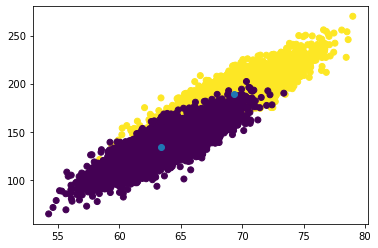

In [334]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(algo.centroids[:,0], algo.centroids[:,1])
